### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('../data/coupons.csv')

In [3]:
#Used below code to understand the dataset better at high level

#Information about the dataset
data.info()

# Number of rows 
print(data.shape[0])

#Number of columns
print(data.shape[1])

# 20 Random Samples from the dataset
data.sample(n=10)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9072,No Urgent Place,Kid(s),Sunny,80,10AM,Coffee House,1d,Female,26,Married partner,...,1~3,4~8,4~8,less1,1,0,0,0,1,1
534,No Urgent Place,Kid(s),Sunny,55,2PM,Restaurant(<20),1d,Male,50plus,Married partner,...,1~3,4~8,4~8,less1,1,1,0,0,1,1
4590,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,36,Married partner,...,never,1~3,1~3,less1,1,1,0,0,1,0
1121,Work,Alone,Sunny,55,7AM,Coffee House,2h,Female,41,Married partner,...,less1,4~8,1~3,less1,1,1,0,0,1,1
10924,Work,Alone,Snowy,30,7AM,Bar,1d,Female,21,Unmarried partner,...,1~3,4~8,1~3,less1,1,1,1,0,1,1
8024,No Urgent Place,Friend(s),Snowy,30,10PM,Carry out & Take away,1d,Male,21,Single,...,1~3,1~3,less1,less1,1,1,0,0,1,0
7946,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Female,26,Single,...,less1,1~3,gt8,gt8,1,1,1,0,1,1
5626,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,26,Single,...,1~3,4~8,1~3,less1,1,1,0,0,1,1
1439,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,46,Single,...,never,1~3,less1,less1,1,0,0,0,1,0
1303,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,1~3,1~3,4~8,never,1,0,0,0,1,1


2. Investigate the dataset for missing or problematic data.

In [4]:
#print (f"Destination: {data['destination'].unique()}\n")
#print (f"Coupon: {data['coupon'].unique()}\n")
#print (f"Marital Status: {data['maritalStatus'].unique()}\n")
#print (f"Weather: {data['weather'].unique()}\n")
#print (f"Passenger: {data['passanger'].unique()}\n")
#print (f"occupation: {data['occupation'].unique()}\n")
#print (f"age: {data['age'].unique()}\n")
#print (f"Income: {data['income'].unique()}\n")
#print (f"RestaurantLessThan20: {data['RestaurantLessThan20'].unique()}\n")
#print (f"Bar: {data['Bar'].unique()}\n")
#print (f"CoffeeHouse: {data['CoffeeHouse'].unique()}\n")

#print (f"car: {data['car'].unique()}\n")
#print (f"{data['car'].value_counts()}\n")
#Car data is pretty much not of much use due to the high number of nan's.

#print (data['Bar'].value_counts())
#print (f"Bar: {data['Bar'].unique()}\n")


#print (data['CoffeeHouse'].value_counts())
#print (f"CoffeeHouse: {data['CoffeeHouse'].unique()}\n")


3. Decide what to do about your missing data -- drop, replace, other...

In [5]:
#since car column has quite a lot of nan values, we will drop the column as it is not of much use for now
del data['car']

In [6]:
#clean up nan values
data = data.dropna()

In [7]:
data.count()

destination             12079
passanger               12079
weather                 12079
temperature             12079
time                    12079
coupon                  12079
expiration              12079
gender                  12079
age                     12079
maritalStatus           12079
has_children            12079
education               12079
occupation              12079
income                  12079
Bar                     12079
CoffeeHouse             12079
CarryAway               12079
RestaurantLessThan20    12079
Restaurant20To50        12079
toCoupon_GEQ5min        12079
toCoupon_GEQ15min       12079
toCoupon_GEQ25min       12079
direction_same          12079
direction_opp           12079
Y                       12079
dtype: int64

4. What proportion of the total observations chose to accept the coupon? 

In [8]:
#Get a total count individuals who accepted coupon and divide by the total number of individuals

data['Y'].value_counts()[1] / data['Y'].shape[0]

0.5693352098683666

5. Use a bar plot to visualize the `coupon` column.

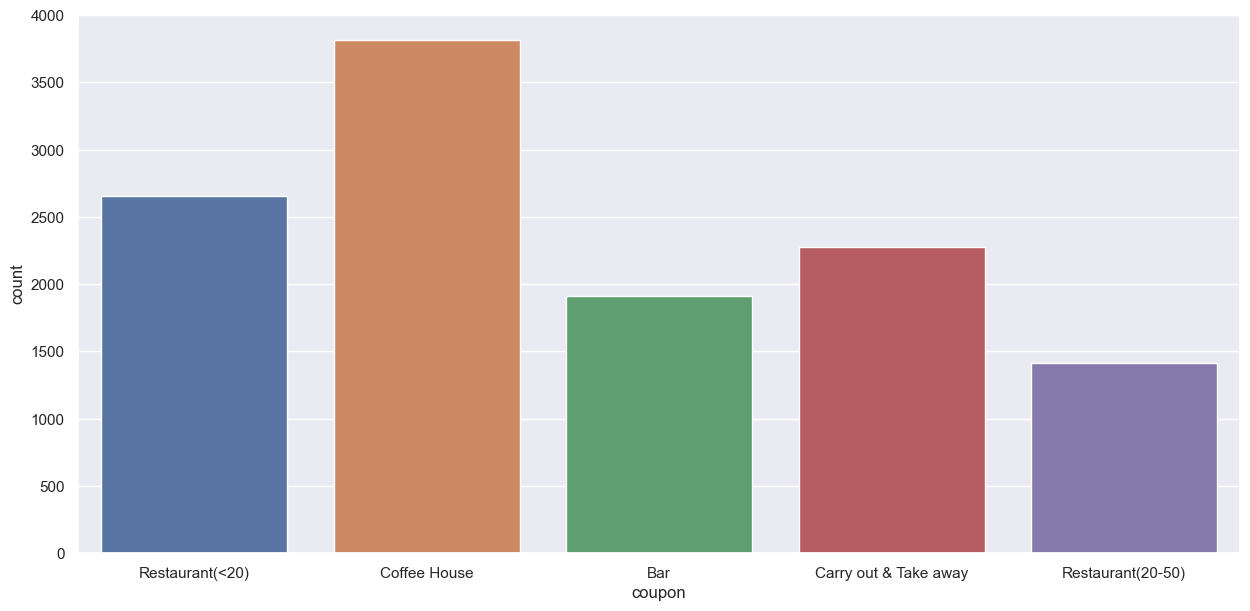

In [11]:
sns.countplot(x=data['coupon'], width=0.8)
sns.set(rc={'figure.figsize':(15,7.0)})
plt.savefig('../images/barcoupons.png')

6. Use a histogram to visualize the temperature column.

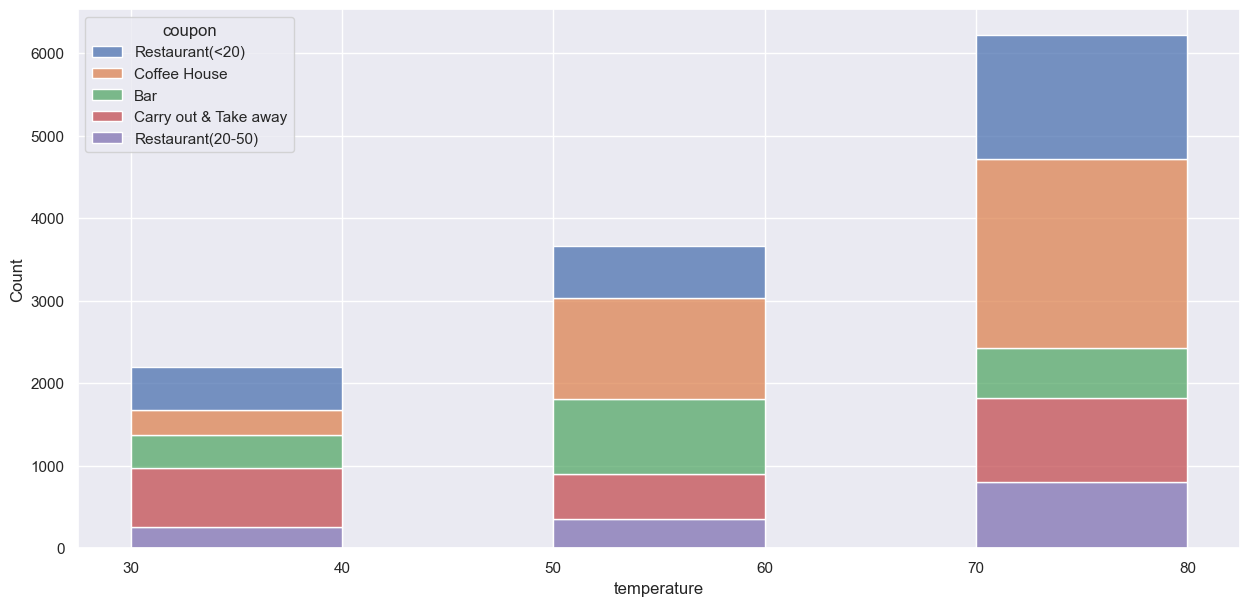

In [13]:
sns.histplot(data, x='temperature',binwidth=10,hue='coupon', multiple="stack")
plt.savefig('../images/temperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [14]:
 df_bar = data.query("coupon == 'Bar' ")

2. What proportion of bar coupons were accepted?


In [15]:
#Get a count of the rows where Coupon(Y) == 1 and divide that by the total number of rows of bar coupons dataframe
df_bar.query("Y == 1 ").shape[0] / df_bar.shape[0]

0.41191845269210664

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
num_bar_three_or_more = 0
num_bar_more_than_three = 0

#Filters for selections

less_than_three_filter = ['less1', '1~3']
more_than_three_filter = ['gt8', '4~8']

# Number of individuals who went to bar 3 or fewer times a month
num_bar_three_or_more = df_bar.query("Y == 1 and Bar in @less_than_three_filter").shape[0]
print(f"Acceptance rate of those who went to bar 3 or fewer times a month: {num_bar_three_or_more/df_bar.shape[0]}")


# Number of individuals who went to bar more than 3 times a month
num_bar_more_than_three = df_bar.query("Y == 1 and Bar in @more_than_three_filter").shape[0]

print(f"Acceptance rate of those who went to bar more than 3 times a month: {num_bar_more_than_three/df_bar.shape[0]}")


Acceptance rate of those who went to bar 3 or fewer times a month: 0.25718766335598536
Acceptance rate of those who went to bar more than 3 times a month: 0.07684265551489806


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [17]:
# Number of individuals who went to bar more than once and are over the age of 25

#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
age_above_25_filter = ['46', '26', '31', '41', '50plus', '36']

num_bar_once_age25 = df_bar.query("Y == 1 and Bar in @more_than_once_filter and age in @age_above_25_filter").shape[0]

print(f"Acceptance rate of those who went to bar more than once and are over 25 years of age : {num_bar_once_age25/df_bar.shape[0]}")
      

Acceptance rate of those who went to bar more than once and are over 25 years of age : 0.14532148457919497


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [18]:
#Number of individuals who went to bar more than once and had passengers that were not a kid 
# and had occupations other than farming, fishing or forestry.

#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
passenger_not_kids_filter = ['Friend(s)', 'Partner']
farm_fish_forest_filter = ['Farming Fishing & Forestry']

num_individuals_criteria_match = df_bar.query("Y == 1 and Bar in @more_than_once_filter and passanger in @passenger_not_kids_filter and occupation not in @farm_fish_forest_filter").shape[0]

print(f"Number of individuals who went to bar more than once and had passengers that were not a kid and had occupations other than farming, fishing or forestry : {num_individuals_criteria_match/df_bar.shape[0]}")

Number of individuals who went to bar more than once and had passengers that were not a kid and had occupations other than farming, fishing or forestry : 0.0705697856769472


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [19]:
# Individuals who go to bars more than once a month, had passengers that were not a kid, and were not widowed 

#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
passenger_not_kids_filter = ['Friend(s)', 'Partner']
widowed = ['Widowed']

num_individuals_1 =  df_bar.query("Y == 1 and Bar in @more_than_once_filter and passanger in @passenger_not_kids_filter and maritalStatus not in @widowed ").shape[0]

print(f"Acceptance rateof number of individuals who go to bars more than once a month, had passengers that were not a kid, and were not widowed: {num_individuals_1/df_bar.shape[0]}")

# Individuals go to bars more than once a month and are under the age of 30

#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
age_under_30_filter = ['21', '26','below21']

num_individuals_2 =  df_bar.query("Y == 1 and Bar in @more_than_once_filter and age in @age_under_30_filter ").shape[0]
print(f"Acceptance rate of number of individuals who go to bars more than once a month and are under the age of 30: {num_individuals_2/df_bar.shape[0]}")

#filters for selection
income_less_than_50k_filter = ['$12500 - $24999', '$37500 - $49999',  '$25000 - $37499', 'Less than $12500']
RestaurantLessThan20_4_times_filter = ['4~8', 'gt8']

#Individuals who go to cheap restaurants more than 4 times a month and income is less than 50K
num_individuals_3 = df_bar.query("Y == 1 and RestaurantLessThan20 in @RestaurantLessThan20_4_times_filter and income in @income_less_than_50k_filter ").shape[0]

print(f"Acceptance rate of number of Individuals who go to cheap restaurants more than 4 times a month and income is less than 50K: {num_individuals_3/df_bar.shape[0]}")

Acceptance rateof number of individuals who go to bars more than once a month, had passengers that were not a kid, and were not widowed: 0.0705697856769472
Acceptance rate of number of individuals who go to bars more than once a month and are under the age of 30: 0.12336644014636697
Acceptance rate of number of Individuals who go to cheap restaurants more than 4 times a month and income is less than 50K: 0.07945635128071092


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [20]:
#
#Individuals who went to bar 3 or fewer times a month tend to have higher acceptance rate of bar coupon than any other segment observed

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
#Create a dataframe for CoffeeHouse
df_coffee = data.query("coupon == 'Coffee House' ")
    
#CoffeeHouse: ['less1' '4~8' '1~3' 'gt8' 'never']

In [22]:
#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
age_above_25_filter = ['46', '26', '31', '41', '50plus', '36']
age_lessthan_25_filter = ['21', 'below21']

num_individuals_1 =  df_coffee.query("Y == 1 and CoffeeHouse in @more_than_once_filter and age in @age_lessthan_25_filter").shape[0]
print(f"Acceptance rate of number of individuals who go to CoffeeHouse more than once a month and age less than 25 : {num_individuals_1/df_coffee.shape[0]}")

num_individuals_2 =  df_coffee.query("Y == 1 and CoffeeHouse in @more_than_once_filter and age in @age_above_25_filter").shape[0]
print(f"Acceptance rate of number of individuals who go to CoffeeHouse more than once a month and age more than 25 : {num_individuals_2/df_coffee.shape[0]}")


Acceptance rate of number of individuals who go to CoffeeHouse more than once a month and age less than 25 : 0.0980083857442348
Acceptance rate of number of individuals who go to CoffeeHouse more than once a month and age more than 25 : 0.22458071278825995


In [23]:
#filters for selection
more_than_once_filter = ['1~3','gt8', '4~8']
income_less_than_50k_filter = ['$12500 - $24999', '$37500 - $49999',  '$25000 - $37499', 'Less than $12500']
income_more_than_50k_filter = ['$62500 - $74999', '$75000 - $87499', '$50000 - $62499', '$100000 or More' ,  '$87500 - $99999']
